# 多项式回归与正则化

产生测试数据


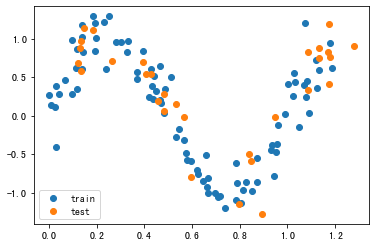

In [192]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_size = 90
test_size = 30
train_X = np.random.uniform(low=0, high=1.2, size=train_size)
test_X = np.random.uniform(low=0.1, high=1.3, size=test_size)
train_y = np.sin(train_X * 2 * np.pi) + np.random.normal(0, 0.2, train_size)
test_y = np.sin(test_X * 2 * np.pi) + np.random.normal(0, 0.2, test_size)
# y=sin(2Pi x)+高斯分布随机数

plt.scatter(train_X,train_y,label="train")
plt.scatter(test_X,test_y,label="test")
plt.legend()



## 线性回归


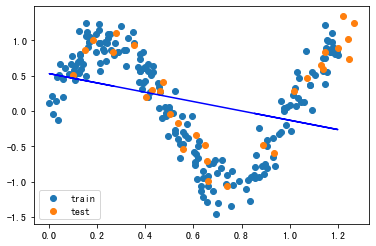

In [190]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

train_X_2D=np.array(train_X).reshape(-1, 1)
lr.fit(train_X_2D, train_y)
plt.plot(train_X, lr.predict(train_X_2D), color = 'blue') 

plt.scatter(train_X,train_y,label="train")
plt.scatter(test_X,test_y,label="test")
plt.legend()
plt.show()

## 多项式回归

2阶多项式回归 训练mse： 0.281 测试mse： 0.180
3阶多项式回归 训练mse： 0.095 测试mse： 0.298
4阶多项式回归 训练mse： 0.057 测试mse： 0.054
5阶多项式回归 训练mse： 0.042 测试mse： 0.090
6阶多项式回归 训练mse： 0.042 测试mse： 0.056
7阶多项式回归 训练mse： 0.041 测试mse： 0.035
8阶多项式回归 训练mse： 0.041 测试mse： 0.036


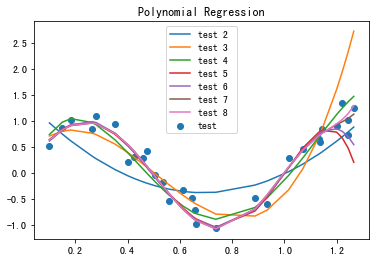

In [191]:

polynomialList=[2,3,4,5,6,7,8]
for degree in polynomialList:

    poly = PolynomialFeatures(degree) # 次数为6
    train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
    test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))
    # fit即先对数据进行拟合，求得训练数据的固有属性，例如方差均值最值等属性，transform对数据进行归一化标准化等操作，将数据缩放映射至某个固定区间

    poly.fit(train_poly_X, train_y) 
    lrPoly = LinearRegression() 
    lrPoly.fit(train_poly_X, train_y)

    train_pred_y=lrPoly.predict(train_poly_X)
    test_pred_y=lrPoly.predict(test_poly_X)
    
    training_mse = mean_squared_error(train_pred_y, train_y)
    test_mse = mean_squared_error(test_pred_y, test_y)
    print("%d阶多项式回归"%degree,"训练mse： %.3f"%training_mse,"测试mse： %.3f"%test_mse )

    
    #plt.scatter(train_X,train_y,label="train")  
    #plt.plot(np.sort(train_X), train_pred_y[np.argsort(train_X)], label=f"train {degree}") 

    #plt.scatter(test_X,test_y,label="test")
    plt.plot(np.sort(test_X), test_pred_y[np.argsort(test_X)], label=f"test {degree} ") 

plt.scatter(test_X,test_y,label="test")
plt.title('Polynomial Regression') 
plt.legend()
plt.show()






## 数据维度


In [153]:
print(train_X.shape)
print(test_X.shape)
print(test_poly_X.shape)
print(test_X)
print(test_poly_X[0])
print(test_poly_X[1])

(30,)
(10,)
(10, 8)
[0.11780292 1.02340127 0.56029579 0.40492103 0.85812331 0.49965327
 0.43018885 0.64054192 0.23485409 0.52593279]
[1.00000000e+00 1.17802918e-01 1.38775276e-02 1.63481325e-03
 1.92585772e-04 2.26871660e-05 2.67261437e-06 3.14841773e-07]
[1.         1.02340127 1.04735016 1.07185949 1.09694236 1.1226122
 1.14888276 1.17576807]


## ridge回归 - 正则化

[[0 1 2 3 4 5 6]]
alpha1 训练mse： 0.205 测试mse： 0.257
alpha3 训练mse： 0.238 测试mse： 0.216
alpha5 训练mse： 0.269 测试mse： 0.224
alpha9 训练mse： 0.315 测试mse： 0.264
alpha15 训练mse： 0.359 测试mse： 0.316
alpha50 训练mse： 0.438 测试mse： 0.425
alpha100 训练mse： 0.463 测试mse： 0.460


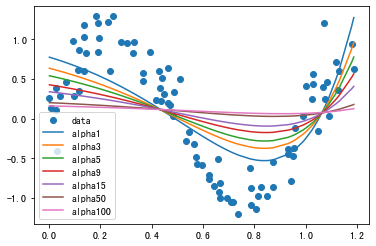

In [200]:
degree=6
poly = PolynomialFeatures(degree) 
train_poly_X = poly.fit_transform(train_X.reshape(train_size, 1))
test_poly_X = poly.fit_transform(test_X.reshape(test_size, 1))
    
print(np.transpose(poly.powers_) )


plt.scatter(train_X, train_y, label="data")

alphaList=[1,3,5,9,15,50,100]
for alpha in alphaList:
    model = Ridge(alpha)
    model.fit(train_poly_X, train_y)
    train_pred_y = model.predict(train_poly_X)
    test_pred_y = model.predict(test_poly_X)
    training_mse = mean_squared_error(train_pred_y, train_y)
    test_mse = mean_squared_error(test_pred_y, test_y)
    print("alpha%d"%alpha,"训练mse： %.3f"%training_mse,"测试mse： %.3f"%test_mse )
    plt.plot(np.sort(train_X), train_pred_y[np.argsort(train_X)], label=f"alpha{alpha}")


#plt.scatter(train_X, train_y)

plt.legend()
plt.show()

